<a href="https://colab.research.google.com/github/hemantupadhyay24/Machine-Learning-/blob/master/Kmeans_wine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns

In [0]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [0]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


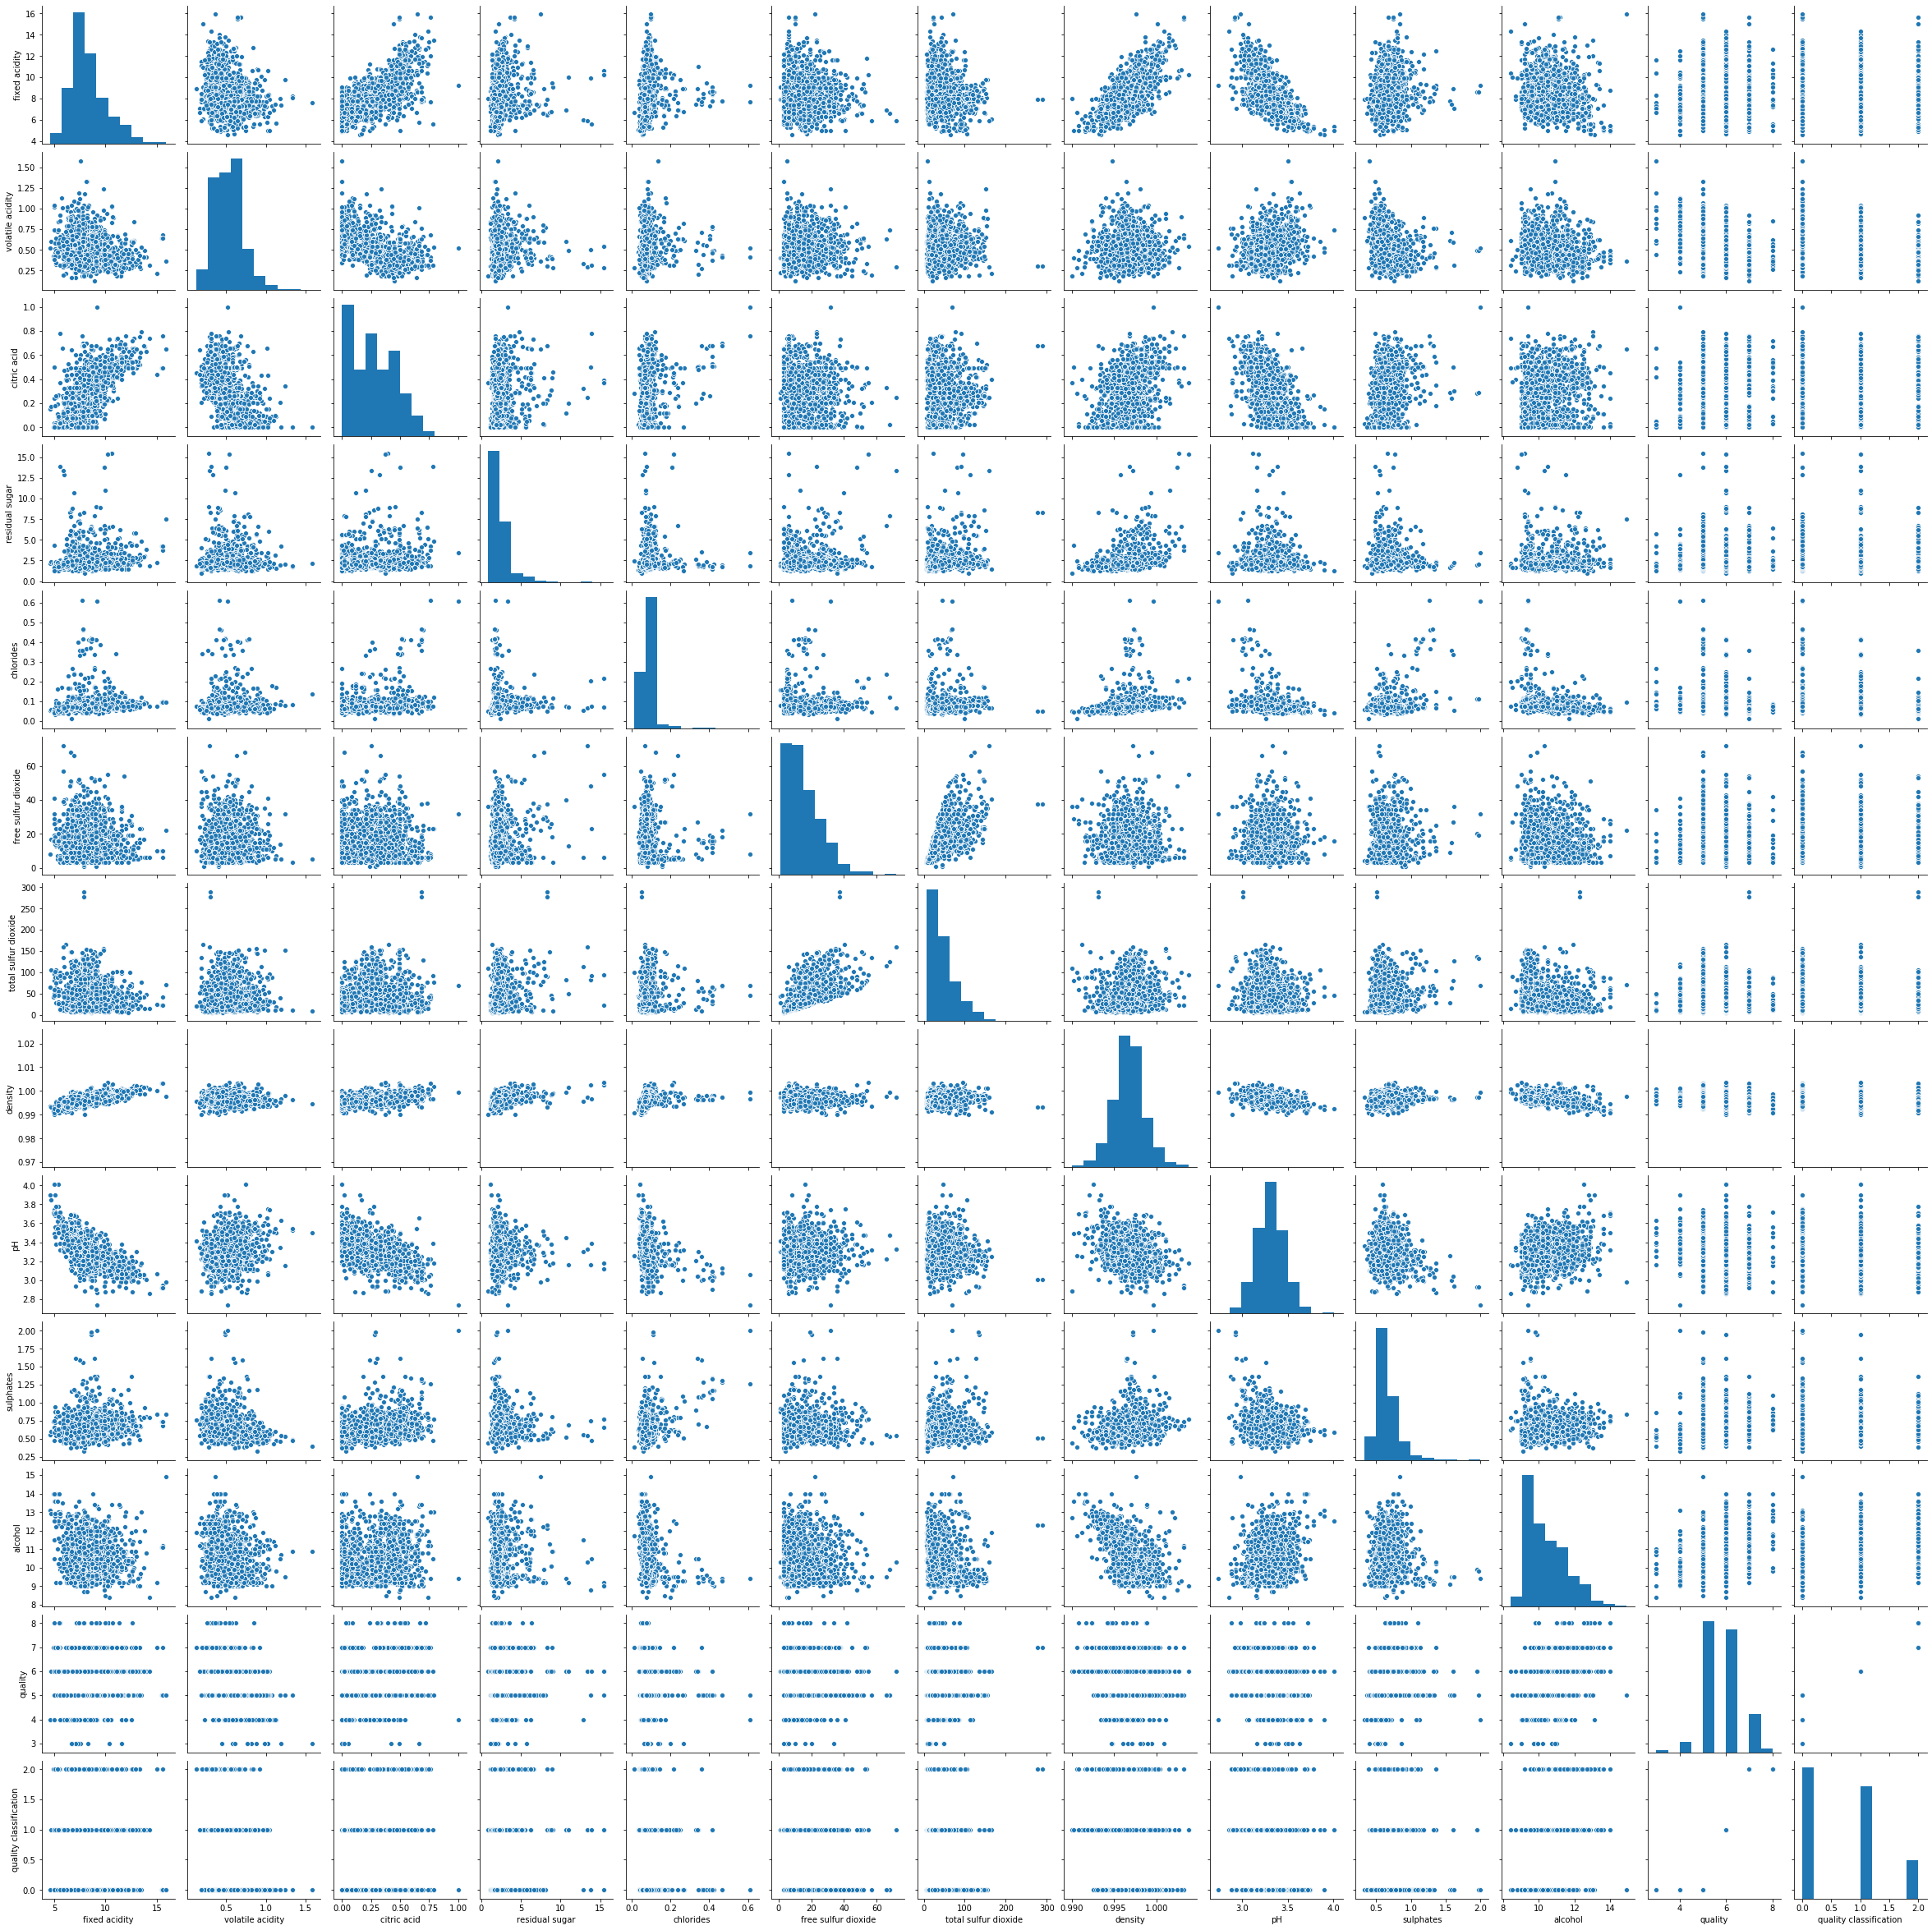

In [0]:
sns.pairplot(df)

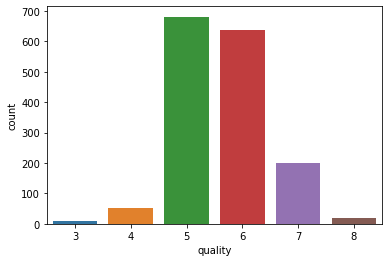

In [0]:
sns.countplot(x='quality', data=df)

In [0]:
def classify_wine_quality(quality):
    if quality < 6:
        return 0
    elif quality == 6:
        return 1
    else:
        return 2
    
df['quality classification'] = df['quality'].apply(classify_wine_quality)

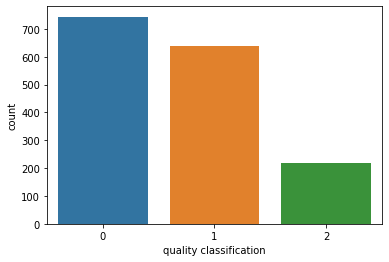

In [0]:
sns.countplot(x='quality classification', data=df)

In [0]:
x = df.iloc[:,0:11]
y = df['quality classification']
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality classification, Length: 1599, dtype: int64

In [0]:
#spliting data for testing and training
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [0]:
#scaling the data for fit
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
# x = sc.fit_transform(x)

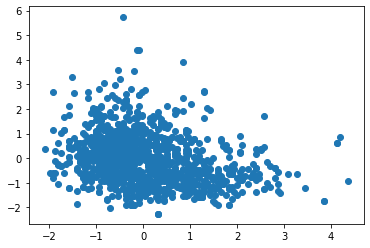

In [0]:
X_train = np.array(X_train)
plt.scatter(X_train[:,0],X_train[:,1],label='True Position')
plt.show()

print(kmeans.cluster_centers_)  

In [0]:
kmeans = KMeans(n_clusters=3, random_state=1)  
kmeans.fit(X_train)
y_pred= kmeans.predict(X_train)
print(y_pred)

[2 2 2 ... 1 2 1]


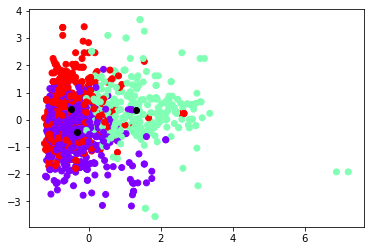

In [0]:
plt.scatter(X_train[:,6], X_train[:,7], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,6] ,kmeans.cluster_centers_[:,7], color='black') 

In [0]:
print(kmeans.score)

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)>


In [0]:
accuracy_score(y_train, y_pred)

0.38076622361219703

In [0]:
# the adjusted Rand index is a function that measures the similarity of the two assignments, 
# ignoring permutations and with chance normalization
metrics.adjusted_rand_score(y_train, y_pred)

0.0433938992273627